# Excercise 1 (Multi) - Linear regression with multiple variables

## 3.1 - Feature Normalization

In [136]:
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams

In [137]:
%matplotlib inline
rcParams['figure.figsize'] = 6,5

Load data from file

In [138]:
data = np.loadtxt('ex1data2.txt', delimiter=',')

X = data[:, [0,1]]
y = data[:, 2]

m = y.size 
X = X.reshape((m, 2))
y = y.reshape((m, 1))

Print examples from dataset

In [139]:
print('First 10 examples from the dataset:')
print('X = ')
print(X[:10, :])

print()

print('y = ')
print(y[:10])

First 10 examples from the dataset:
X = 
[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]

y = 
[[399900.]
 [329900.]
 [369000.]
 [232000.]
 [539900.]
 [299900.]
 [314900.]
 [198999.]
 [212000.]
 [242500.]]


Normalizing features 

In [140]:
def feature_normalize(X):
    # Calculate dimensions of X
    m, num_features = X.shape

    # Setup some variables for calculations
    X_norm = X.copy()
    mu = np.zeros((1, num_features))
    sigma = np.zeros((1, num_features))

    # Calculate mean and standard deviation for each feature in X
    for j in range(num_features):
        mu[0, j] = np.mean(X[:, j])
        sigma[0, j] = np.std(X[:, j])

    # Normalize data in X
    for i in range(m):
        for j in range(num_features):
            X_norm[i, j] = (X_norm[i, j] - mu[0, j]) / sigma[0, j]

    return X_norm, mu, sigma

X, mu, sigma = feature_normalize(X)

Add intercept term to X and print sample data of normalized X

In [141]:
X = np.hstack((np.ones((m, 1)), X))

print(X[:10, :])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]
 [ 1.         -0.01994505  1.10220517]
 [ 1.         -0.59358852 -0.22609337]
 [ 1.         -0.72968575 -0.22609337]
 [ 1.         -0.78946678 -0.22609337]
 [ 1.         -0.64446599 -0.22609337]]


## 3.2 - Gradient descent

In [142]:
def compute_cost_multi(X, y, theta):
    m = y.size
    h = X @ theta
    return 1 / (2 * m) * np.sum((h - y) ** 2)

def gradient_descent_multi(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m, num_features = X.shape
    J_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        h = X @ theta
        tmp = np.zeros((num_features, 1))

        for j in range(num_features):
            col = X[:, j].reshape((m, 1))
            tmp[j] = theta[j] - (alpha / m) * np.sum((h - y) * col)

        # Update all theta values simultaneously
        theta = tmp.copy()

        # Store history of cost(J) through each iteration
        J_history[i, 0] = compute_cost_multi(X, y, theta)

    return theta, J_history

Run gradient descent with various alphas and plot iterations vs J value

In [143]:
# Define variables for gradient descent
num_iters = 400

# Run gradient descent with alpha = 0.1
alpha = 0.1
theta = np.zeros((3, 1))
theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)
J1 = J_history

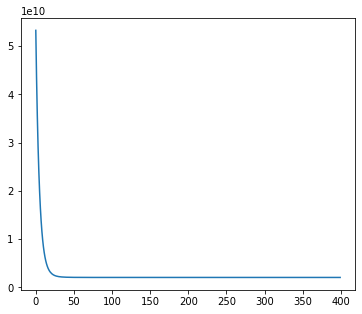

In [144]:
x = np.arange(0, J1.size)
plt.plot(x, J1)